In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
torch.manual_seed(1) #reproducible

# Defining the Hyperparameter
Defining the Hyperparameter for the network

In [5]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = True

In [7]:
# Downloading the MNIST Dataset
train_data = torchvision.datasets.MNIST(root = './mnist/', train=True, transform=torchvision.transforms.ToTensor(), download=DOWNLOAD_MNIST)

100.1%

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


113.5%

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw


100.4%

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


180.4%

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


In [9]:
print(train_data.train_data.size())
print(train_data.train_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


/home/lucifer/torch-gpu/lib/python3.7/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


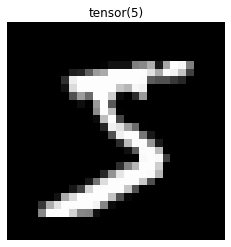

In [11]:
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title(train_data.train_labels[0])
plt.axis('off')
plt.show()

In [12]:
# Data Loader for easy mini-batch returns in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)


In [13]:
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, 1))


/home/lucifer/torch-gpu/lib/python3.7/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [16]:
test_x = test_x.type(torch.FloatTensor)[:2000]/255.

In [17]:
test_x

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [18]:
test_y = test_data.test_labels[:2000]

/home/lucifer/torch-gpu/lib/python3.7/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [19]:
test_y

tensor([7, 2, 1,  ..., 3, 9, 5])

In [52]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25)
        )
        self.fc1 = nn.Linear(32*7*7, 1024)
        self.batchNormal = nn.BatchNorm1d(1024)
        self.out = nn.Linear(1024,10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.batchNormal(x)
        return self.out(x), x

In [53]:
cnn = CNN()

In [44]:
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (fc1): Linear(in_features=1568, out_features=1024, bias=True)
  (batchNormal): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=1024, out_features=10, bias=True)
)

In [54]:
optimizer = torch.optim.Adam(cnn.parameters(), lr = LR)
loss_func = nn.CrossEntropyLoss()

In [55]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print('Step: {}  Loss: {:.9f}'.format(step, loss.data))

Step: 0  Loss: 2.408566475
Step: 100  Loss: 0.161011904
Step: 200  Loss: 0.147911504
Step: 300  Loss: 0.302218974
Step: 400  Loss: 0.051664039
Step: 500  Loss: 0.093713596
Step: 600  Loss: 0.210966095
Step: 700  Loss: 0.153168157
Step: 800  Loss: 0.061013974
Step: 900  Loss: 0.106233448
Step: 1000  Loss: 0.065653540
Step: 1100  Loss: 0.223889306
